<a href="https://colab.research.google.com/github/Leroytheone/DD2424Project/blob/main/DNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.frame import DataFrame
import torch.nn.functional as F
import numpy as np
import os
from torch.optim.lr_scheduler import StepLR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
input_path = '/content/drive/MyDrive/CSD_DNN/Dataset/4db/'
 
files = os.listdir(input_path)
df = pd.DataFrame()
for file in files:
  data_frame = pd.read_csv(input_path+file, index_col=0, header = None)
  df = df.append(data_frame)
  # print(df.shape)

df.reset_index(inplace=True)
df = df.reindex(np.random.permutation(df.index))
print(df)

y = df.iloc[:, 0]
x = df.iloc[:, 1:]

print(type(x))  # <class 'pandas.core.frame.DataFrame'>
x = np.array(x)

'''
x_reshape = []
for i in range(3000):
  x_reshape.append(x[i,:].reshape(32,32))
x = x_reshape
'''

print(type(x))  # <class 'list'>
x = torch.unsqueeze(torch.FloatTensor(x), dim=1)
print(type(x))  # <class 'torch.Tensor'>
print(x.shape)  # 

y = np.array(y)
#y = torch.unsqueeze(torch.FloatTensor(y), dim=1)
print(type(y))  # <class 'torch.Tensor'>
print(y.shape)  # torch.Size([3000])

class GetLoader(torch.utils.data.Dataset):
	  # Initialize
    def __init__(self, data_root, data_label):
        self.data = data_root
        self.label = data_label
    # return data and labels
    def __getitem__(self, index):
        data = self.data[index]
        labels = self.label[index]
        return data, labels
    # return length of data
    def __len__(self):
        return len(self.data)

t_size = int(len(x)*0.9)
train_data = GetLoader(x[:t_size-1, :, :], y[:t_size-1])
test_data = GetLoader(x[t_size:, :, :], y[t_size:])

train_loader = torch.utils.data.DataLoader(train_data,batch_size=54,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=300,shuffle=True)

      0         1         2     ...      1022      1023      1024
1326     1 -0.957386 -3.339412  ...  2.781444  3.584370 -1.595978
2656     2 -5.626486  0.980924  ... -3.074700  3.002953  4.029318
1556     1  1.351839  4.178259  ...  2.962865  1.956340  1.968170
1785     1  5.682075  4.845234  ...  2.611556 -1.500547 -0.240002
2841     2  1.734614  4.056955  ...  2.708553 -1.097261  3.143473
...    ...       ...       ...  ...       ...       ...       ...
473      0  2.339614  0.996649  ... -5.792352  5.855069 -5.713524
1511     1  3.771372 -0.235159  ...  2.399493  2.905783  0.093106
431      0 -0.577668 -1.198191  ...  1.728049 -0.384429  1.061817
1654     1 -1.533715 -0.256572  ...  7.010230  0.363277 -8.164674
1114     1  0.754049  3.088365  ...  3.157356 -3.663229 -5.154168

[3000 rows x 1025 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'torch.Tensor'>
torch.Size([3000, 1, 1024])
<class 'numpy.ndarray'>
(3000,)


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.l1 = nn.Linear(1024, 256)
        self.l2 = nn.Linear(256, 500)
        #self.l3 = nn.Linear(256, 128)
        self.l3 = nn.Linear(500, 3)

    def forward(self, x):
        x = x.view(-1,1024) 
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.relu(x)
        x = self.l3(x)
        #x = F.relu(x)
        #x = self.l4(x)
        return x
model = Net()
print(model)

Net(
  (l1): Linear(in_features=1024, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=500, bias=True)
  (l3): Linear(in_features=500, out_features=3, bias=True)
)


---------------------------------------------------
epoch:	 0
0:	 1.1589032411575317
training accuracy:	 0.2777777777777778
testing accuracy:	 0.3466666666666667
1:	 6.129960060119629
training accuracy:	 0.3888888888888889
testing accuracy:	 0.33666666666666667
2:	 5.827002048492432
training accuracy:	 0.2777777777777778
testing accuracy:	 0.3566666666666667
3:	 1.164507269859314
training accuracy:	 0.48148148148148145
testing accuracy:	 0.33
4:	 1.2993240356445312
training accuracy:	 0.3333333333333333
testing accuracy:	 0.3233333333333333
5:	 1.406221628189087
training accuracy:	 0.16666666666666666
testing accuracy:	 0.3433333333333333
6:	 1.2133082151412964
training accuracy:	 0.2962962962962963
testing accuracy:	 0.38
7:	 1.18025803565979
training accuracy:	 0.25925925925925924
testing accuracy:	 0.38333333333333336
8:	 1.1043671369552612
training accuracy:	 0.25925925925925924
testing accuracy:	 0.4066666666666667
9:	 1.1033601760864258
training accuracy:	 0.35185185185185186
tes

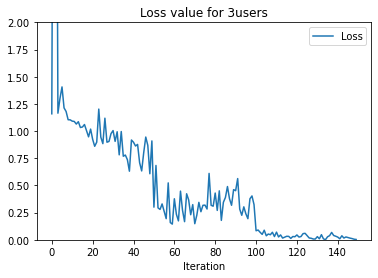

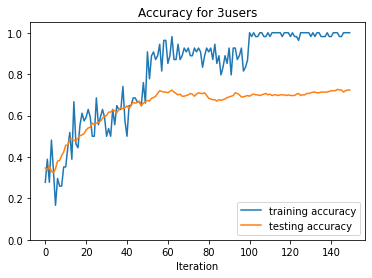

In [ ]:
loss_func = torch.nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9,0.99), weight_decay=0.001) # Adam
scheduler = StepLR(opt, step_size=10, gamma=0.9)

loss = 0
loss_count = []
accuracy_train_count = []
accuracy_test_count = []
for epoch in range(3):
    print("---------------------------------------------------")
    print('epoch:\t',epoch)
    for i,(x,y) in enumerate(train_loader):
        batch_x = Variable(x) 
        batch_y = Variable(y) 
        # trainging
        out = model(batch_x)

        # loss
        batch_y = batch_y.type(torch.LongTensor)
        loss = loss_func(out, batch_y)

        # optimizer
        opt.zero_grad()  # Clear the remaining update parameter values ​​from the previous step
        loss.backward() # Backpropagation of error, calculation of parameter update value
        opt.step() # Apply parameter update values ​​to net parmeters
        scheduler.step()
        loss_count.append(loss)

        # training accuracy
        accuracy_train = torch.max(out,1)[1].numpy() == batch_y.numpy() 

        # testing accuracy
        for a,b in test_loader:
          test_x = Variable(a)
          test_y = Variable(b)
          out_test = model(test_x)
          accuracy_test = torch.max(out_test,1)[1].numpy() == test_y.numpy()            
          break

        if i % 1 == 0:
            print('{}:\t'.format(i), loss.item())
            print('training accuracy:\t',accuracy_train.mean())
            print('testing accuracy:\t',accuracy_test.mean())
            accuracy_train_count.append(accuracy_train.mean())
            accuracy_test_count.append(accuracy_test.mean())

plt.figure('PyTorch_CNN_Loss')
plt.title('Loss value for 3users')
plt.xlabel('Iteration')
plt.ylim((0, 2))
plt.plot(loss_count,label='Loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/CSD_DNN/figure/training_loss_4db_3users-256-500.png',dpi=300)
plt.show()

plt.figure('PyTorch_CNN_Training_accuracy')
plt.title('Accuracy for 3users')
plt.xlabel('Iteration')
plt.ylim((0, 1.05))
plt.plot(accuracy_train_count,label='training accuracy')
plt.plot(accuracy_test_count,label='testing accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/CSD_DNN/figure/accuracy_4db_3uers-256-500.png',dpi=300)
plt.show()